In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [321]:
gdp = pd.read_csv('DataSets/gdp.csv')
gdp.head(2)

,Entity,Code,Year,GDP (constant 2010 US$)
0,Afghanistan,AFG,2002,8.013233e+09
1,Afghanistan,AFG,2003,8.689884e+09


In [322]:
pop = pd.read_csv('DataSets/population.csv')
pop.head(2)

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)"
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000


In [323]:
gdp = pd.read_csv('DataSets/gdp.csv')
pop = pd.read_csv('DataSets/population.csv')
gdp_pop = pd.merge(left = gdp, right = pop, on=['Entity', 'Year'], how='inner')
gdp_pop['gdp_in_billion'] = gdp_pop['GDP (constant 2010 US$)'] / 1_000_000_000

gdp_pop = gdp_pop.rename(columns={'Total population (Gapminder, HYDE & UN)': 'population'})

gdp_pop['gdp_per_capita'] = gdp_pop['GDP (constant 2010 US$)'] / gdp_pop['population']                                                    

gdp_pop_entity = gdp_pop.set_index('Entity')
gdp_pop_entity['pop_ratio'] = gdp_pop_entity['population'] / gdp_pop_entity.query('Year == 1960')['population']
gdp_pop_entity['gdp_per_capita_ratio'] = gdp_pop_entity['gdp_per_capita'] / gdp_pop_entity.query('Year == 1960')['gdp_per_capita']
gdp_pop_entity['gdp_ratio'] = gdp_pop_entity['GDP (constant 2010 US$)'] / gdp_pop_entity.query('Year == 1960')['GDP (constant 2010 US$)']
gdp_pop_entity = gdp_pop_entity.dropna()
gdp_pop = gdp_pop_entity.reset_index()
gdp_pop
                                                                                  

,Entity,Code_x,Year,GDP (constant 2010 US$),Code_y,population,gdp_in_billion,gdp_per_capita,pop_ratio,gdp_per_capita_ratio,gdp_ratio
0,Algeria,DZA,1960,2.743440e+10,DZA,11058000,27.434399,2480.954892,1.000000,1.000000,1.000000
1,Algeria,DZA,1961,2.370183e+10,DZA,11336000,23.701828,2090.845811,1.025140,0.842758,0.863946
2,Algeria,DZA,1962,1.903611e+10,DZA,11620000,19.036113,1638.219736,1.050823,0.660318,0.693878
3,Algeria,DZA,1963,2.556811e+10,DZA,11913000,25.568114,2146.236350,1.077320,0.865085,0.931973
4,Algeria,DZA,1964,2.706114e+10,DZA,12222000,27.061141,2214.133643,1.105263,0.892452,0.986395
...,...,...,...,...,...,...,...,...,...,...,...
5207,Zimbabwe,ZWE,2013,1.418193e+10,ZWE,13350000,14.181927,1062.316603,3.534551,1.192968,4.216605
5208,Zimbabwe,ZWE,2014,1.448359e+10,ZWE,13587000,14.483588,1065.988675,3.597299,1.197091,4.306296
5209,Zimbabwe,ZWE,2015,1.472830e+10,ZWE,13815000,14.728302,1066.109450,3.657665,1.197227,4.379055
5210,Zimbabwe,ZWE,2016,1.481899e+10,ZWE,14030000,14.818986,1056.235654,3.714588,1.186139,4.406017


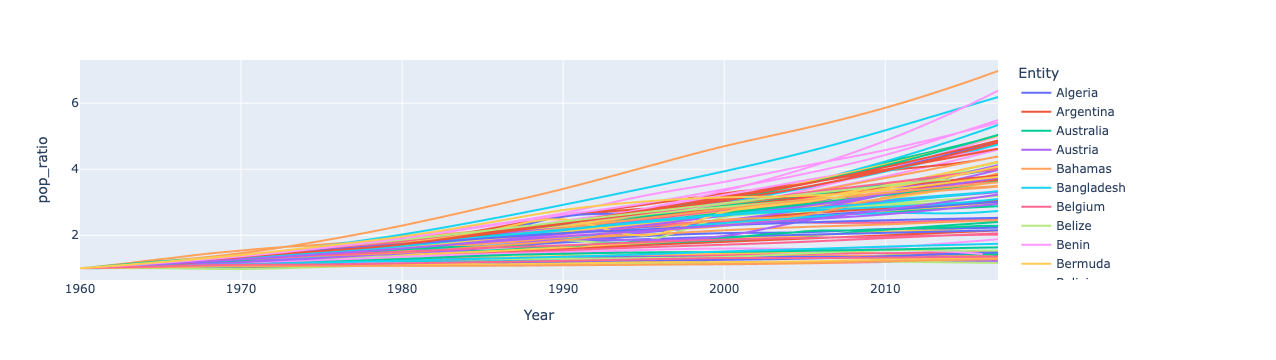

In [324]:
px.line(gdp_pop, x='Year', y='pop_ratio', color = 'Entity')

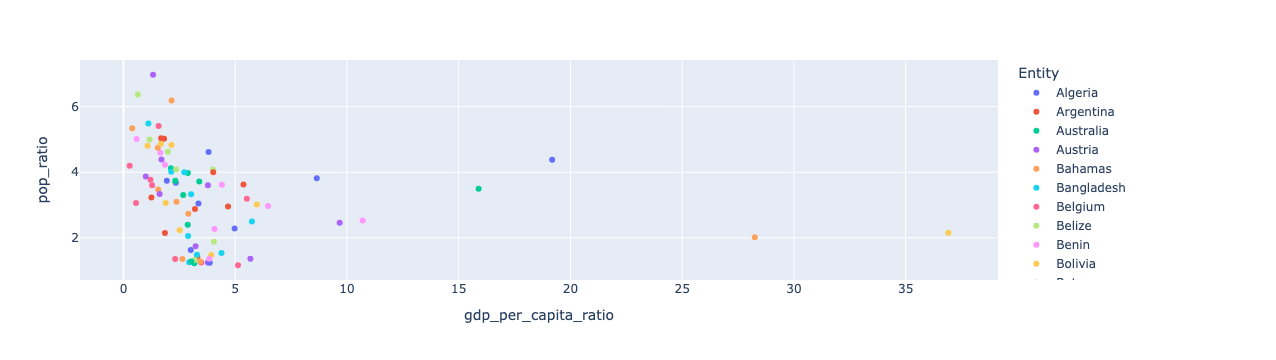

In [325]:
px.scatter(gdp_pop.query('Year == 2017'), x='gdp_per_capita_ratio', y='pop_ratio', color='Entity')

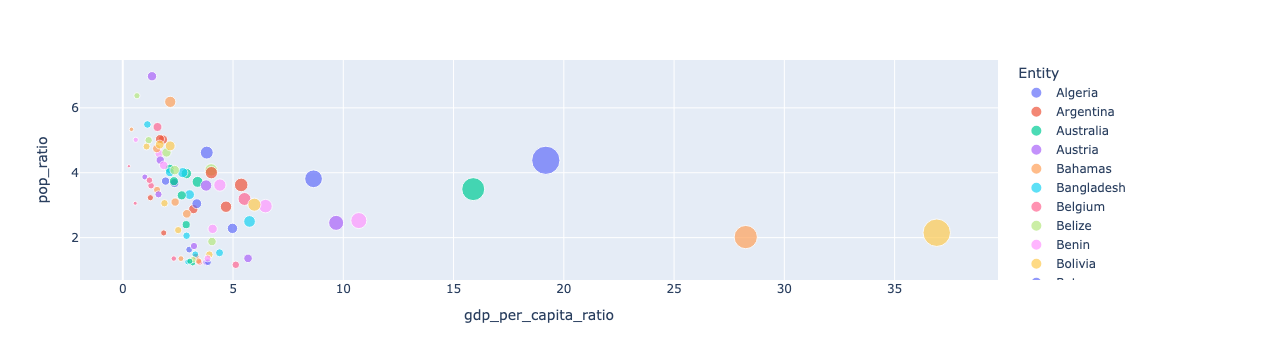

In [326]:
px.scatter(gdp_pop.query('Year == 2017'), x='gdp_per_capita_ratio', y='pop_ratio', color='Entity', size='gdp_ratio')

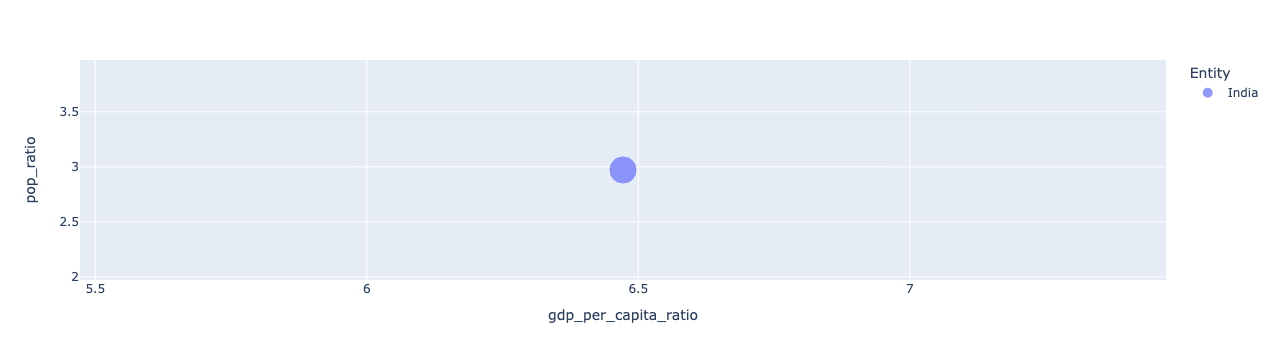

In [327]:
px.scatter(gdp_pop.query('Year == 2017 and Entity == "India"'), x='gdp_per_capita_ratio', y='pop_ratio', color='Entity', size='gdp_ratio')

In [328]:
life = pd.read_csv('DataSets/life_expectancy.csv')
life.head(2)

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878


In [329]:
gdp_pop_le = pd.merge(left=gdp_pop, right=life, on=['Entity', 'Year'], how='inner')
gdp_pop_le

,Entity,Code_x,Year,GDP (constant 2010 US$),Code_y,population,gdp_in_billion,gdp_per_capita,pop_ratio,gdp_per_capita_ratio,gdp_ratio,Code,Life expectancy
0,Algeria,DZA,1960,2.743440e+10,DZA,11058000,27.434399,2480.954892,1.000000,1.000000,1.000000,DZA,46.141
1,Algeria,DZA,1961,2.370183e+10,DZA,11336000,23.701828,2090.845811,1.025140,0.842758,0.863946,DZA,46.599
2,Algeria,DZA,1962,1.903611e+10,DZA,11620000,19.036113,1638.219736,1.050823,0.660318,0.693878,DZA,47.056
3,Algeria,DZA,1963,2.556811e+10,DZA,11913000,25.568114,2146.236350,1.077320,0.865085,0.931973,DZA,47.509
4,Algeria,DZA,1964,2.706114e+10,DZA,12222000,27.061141,2214.133643,1.105263,0.892452,0.986395,DZA,47.958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,Zimbabwe,ZWE,2013,1.418193e+10,ZWE,13350000,14.181927,1062.316603,3.534551,1.192968,4.216605,ZWE,56.897
5208,Zimbabwe,ZWE,2014,1.448359e+10,ZWE,13587000,14.483588,1065.988675,3.597299,1.197091,4.306296,ZWE,58.410
5209,Zimbabwe,ZWE,2015,1.472830e+10,ZWE,13815000,14.728302,1066.109450,3.657665,1.197227,4.379055,ZWE,59.534
5210,Zimbabwe,ZWE,2016,1.481899e+10,ZWE,14030000,14.818986,1056.235654,3.714588,1.186139,4.406017,ZWE,60.294


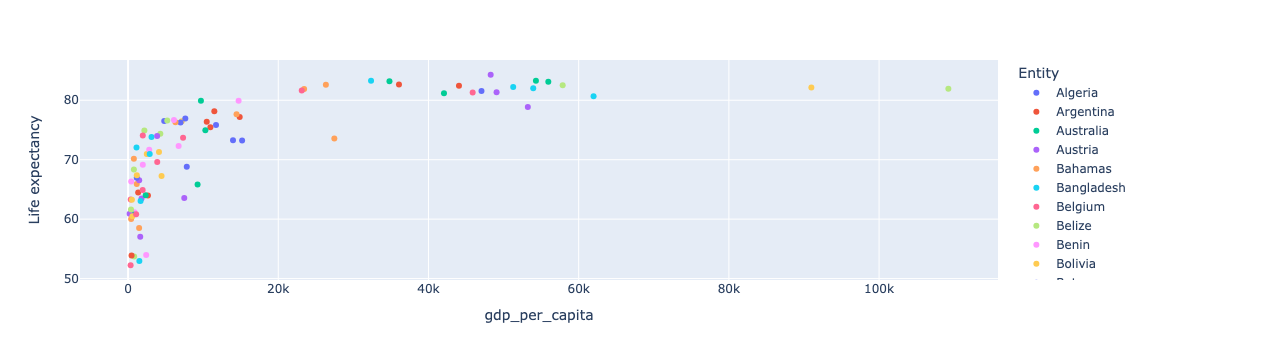

In [330]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', color='Entity')

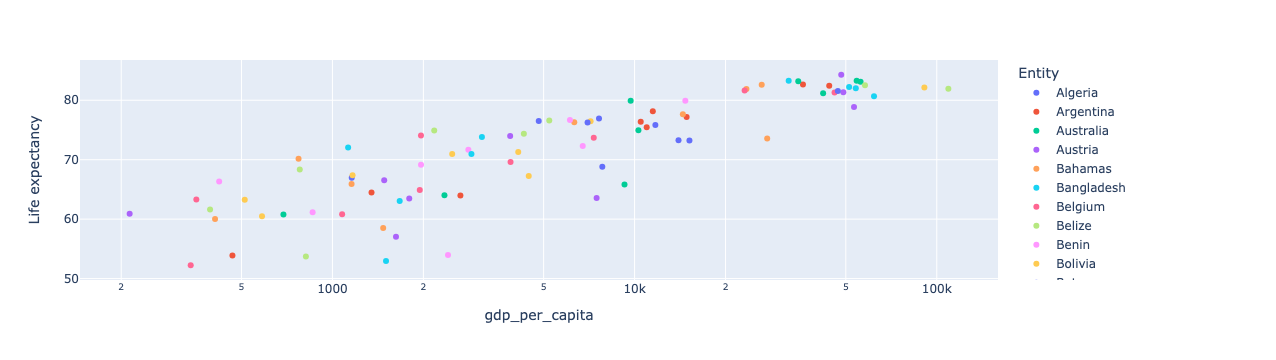

In [331]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', color='Entity', log_x=True)

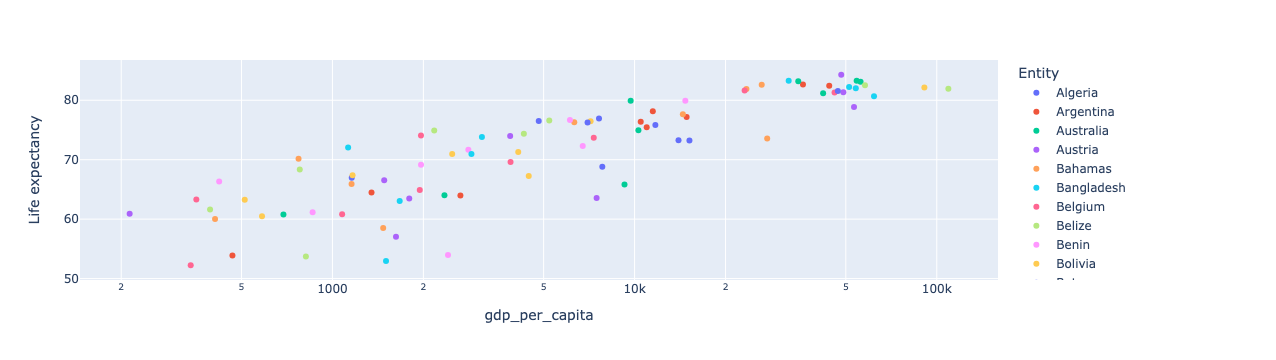

In [332]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', color='Entity', log_x=True)

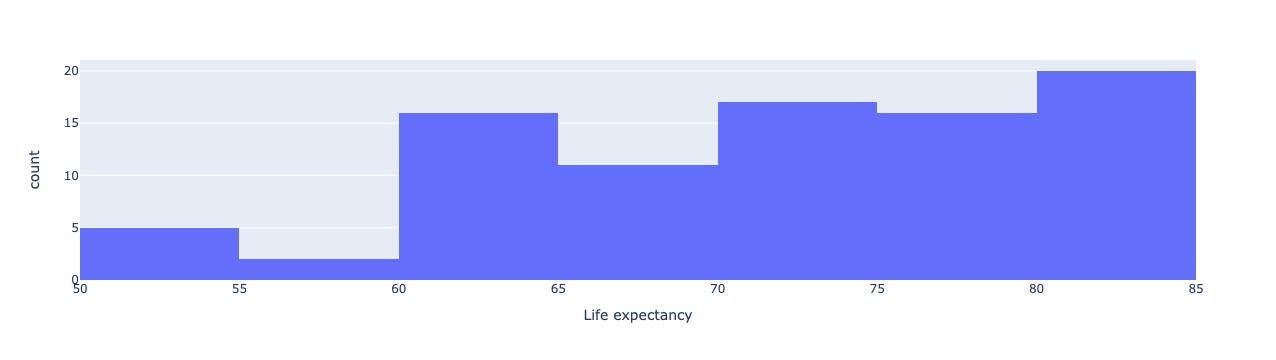

In [333]:
px.histogram(gdp_pop_le.query('Year == 2017'), x='Life expectancy')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



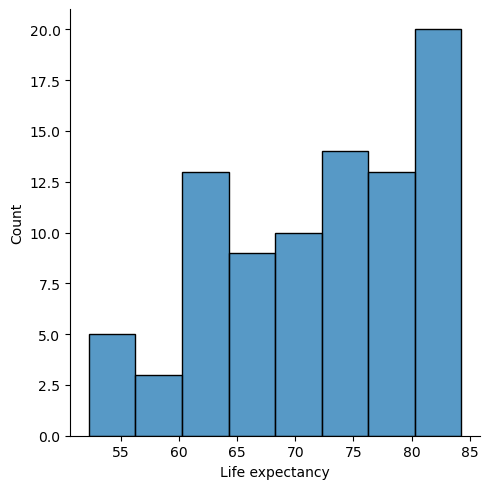

In [334]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



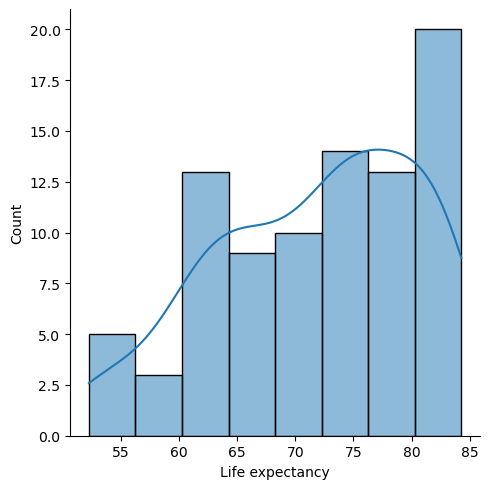

In [335]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'], kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



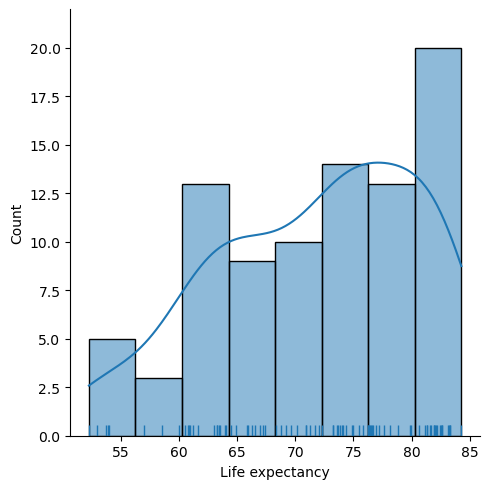

In [336]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'], kde=True, rug=True)

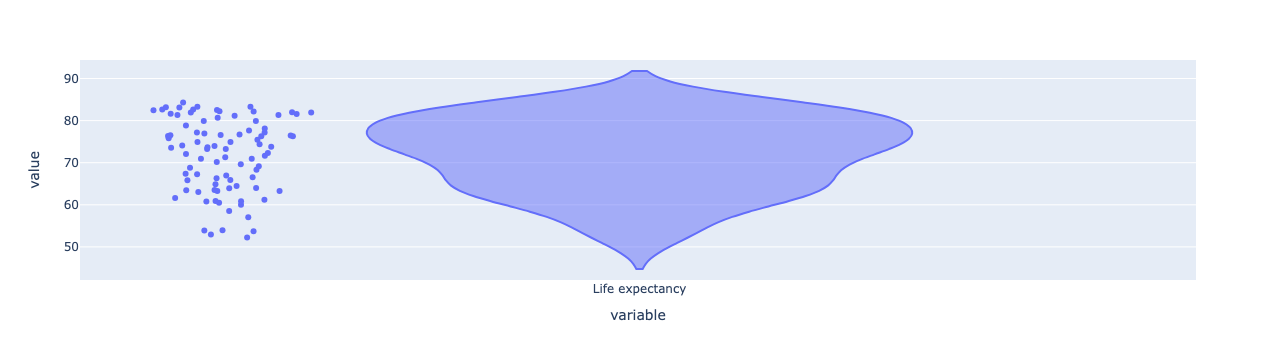

In [364]:
px.violin(gdp_pop_le.query('Year == 2017')['Life expectancy'], points='all')

In [338]:
con = pd.read_csv('DataSets/continents.csv')
con

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
197,Paraguay,South America
198,Peru,South America
199,Suriname,South America
200,Uruguay,South America


In [358]:
gdp_pop_le = pd.merge(left=gdp_pop_le, right=con, left_on = 'Entity', right_on='Country', how='left')
gdp_pop_le.sample(10)

,Entity,Code_x,Year,GDP (constant 2010 US$),Code_y,population,gdp_in_billion,gdp_per_capita,pop_ratio,gdp_per_capita_ratio,gdp_ratio,Code,Life expectancy,Country,Continent
1095,Chad,TCD,2015,1.348624e+10,TCD,14111000,13.486244,955.725632,4.700533,1.372809,6.452934,TCD,53.137,Chad,Africa
4685,Thailand,THA,2010,3.411050e+11,THA,67195000,341.105010,5076.345108,2.452641,8.892441,21.809964,THA,74.184,Thailand,Asia
2977,Malaysia,MYS,1983,5.510102e+10,MYS,14819000,55.101023,3718.268638,1.816945,2.746077,4.989470,MYS,69.090,Malaysia,Asia
3438,Nigeria,NGA,1980,1.437699e+11,NGA,73424000,143.769893,1958.077646,1.626656,1.506279,2.450197,NGA,45.333,Nigeria,Africa
4497,Spain,ESP,1996,9.661054e+11,ESP,39909000,966.105393,24207.707357,1.312710,3.283381,4.310126,ESP,78.405,Spain,Europe
562,Bermuda,BMU,2000,4.945920e+09,BMU,65000,4.945920,76091.071481,1.444444,2.770251,4.001473,BMU,78.416,NaN,NaN
2903,Malawi,MWI,1967,1.321540e+09,MWI,4350000,1.321540,303.802345,1.188525,1.274031,1.514217,MWI,38.494,Malawi,Africa
5077,Uruguay,URY,1996,2.738945e+10,URY,3247000,27.389449,8435.309087,1.278850,1.541014,1.970726,URY,73.854,Uruguay,South America
4489,Spain,ESP,1988,8.025888e+11,ESP,39039000,802.588805,20558.641489,1.284093,2.788445,3.580623,ESP,76.946,Spain,Europe
1217,Colombia,COL,1963,4.167017e+10,COL,17630000,41.670168,2363.594353,1.097895,1.040572,1.142438,COL,58.825,Colombia,South America


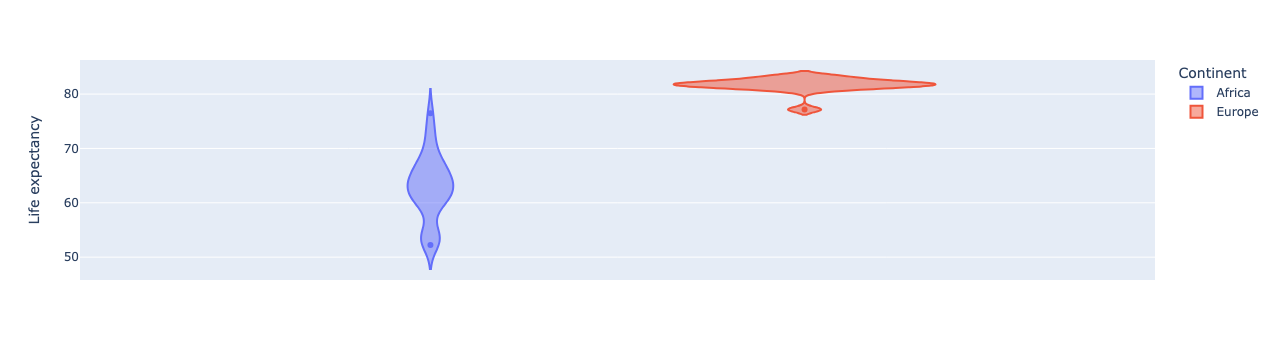

In [372]:
continents = ['Africa', 'Europe']
gdp_pop_le.query('Year == 2017 and Continent in @continents')
px.violin(gdp_pop_le.query('Year == 2017 and Continent in @continents').dropna(), y='Life expectancy', color='Continent')

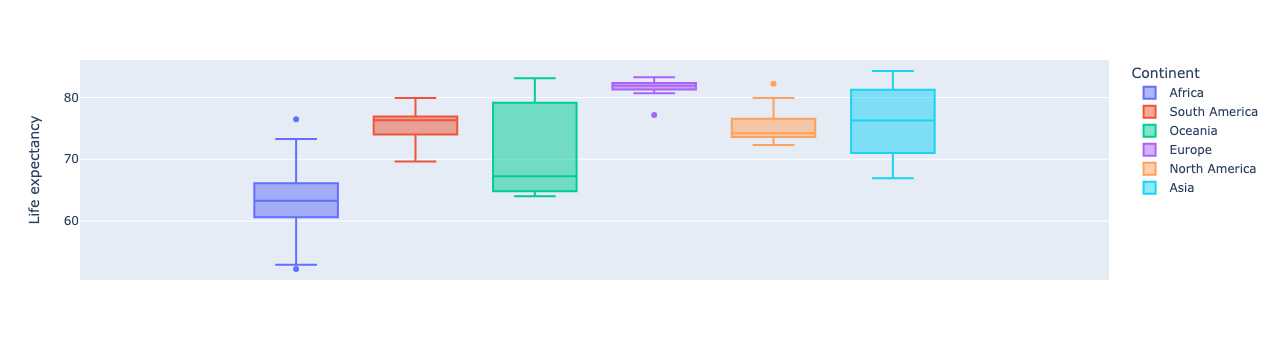

In [376]:
px.box(gdp_pop_le.query('Year == 2017').dropna(), y = 'Life expectancy', color='Continent')

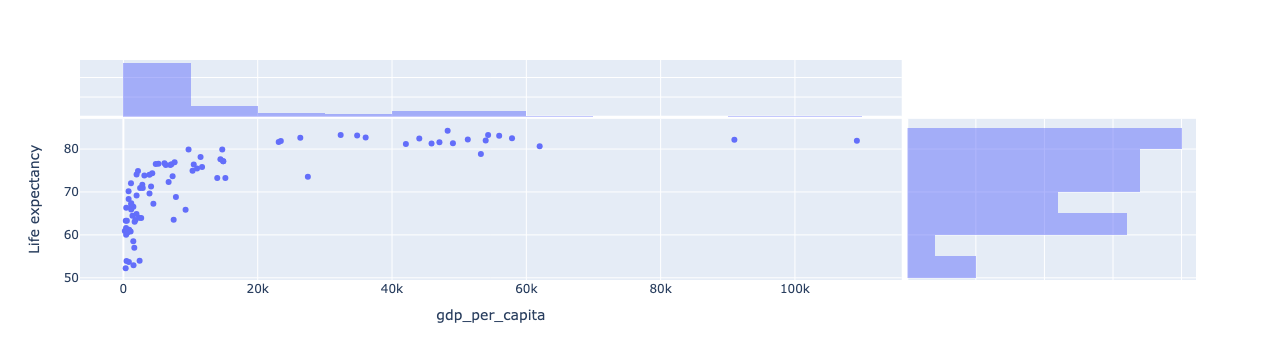

In [388]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_x='histogram', marginal_y='histogram')

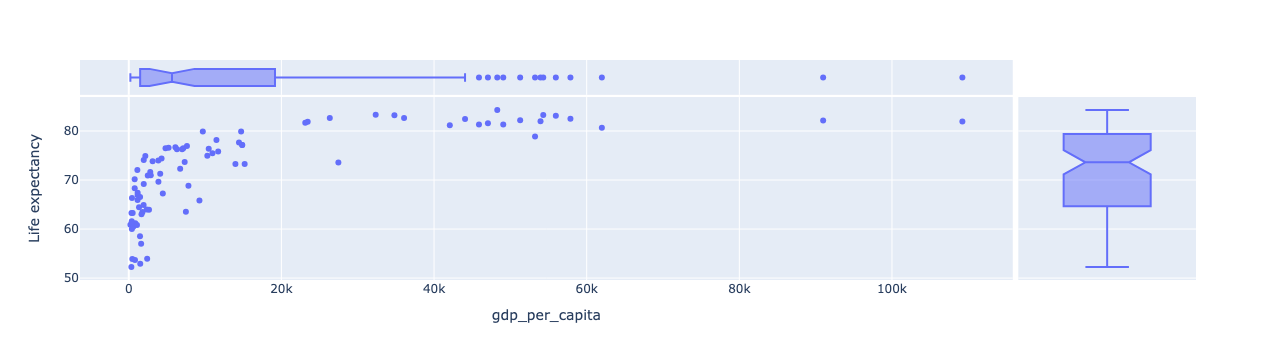

In [390]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_x='box', marginal_y='box')

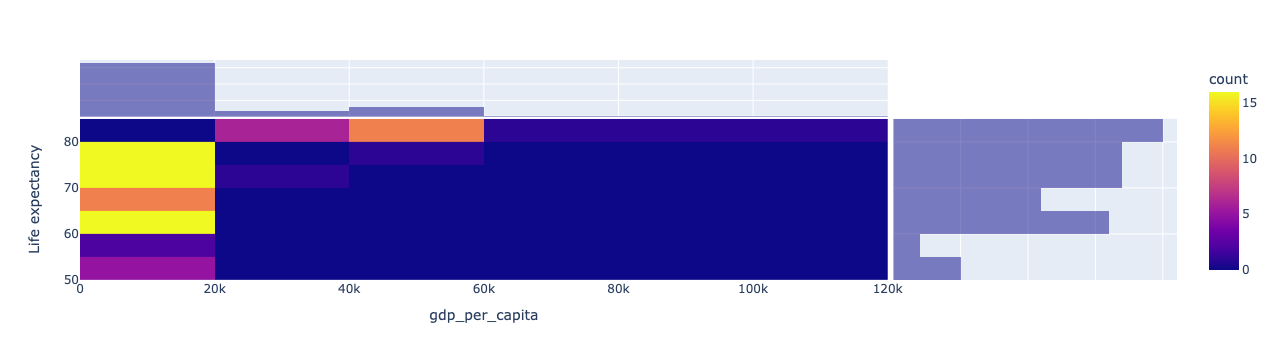

In [392]:
px.density_heatmap(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_x='histogram', marginal_y='histogram')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



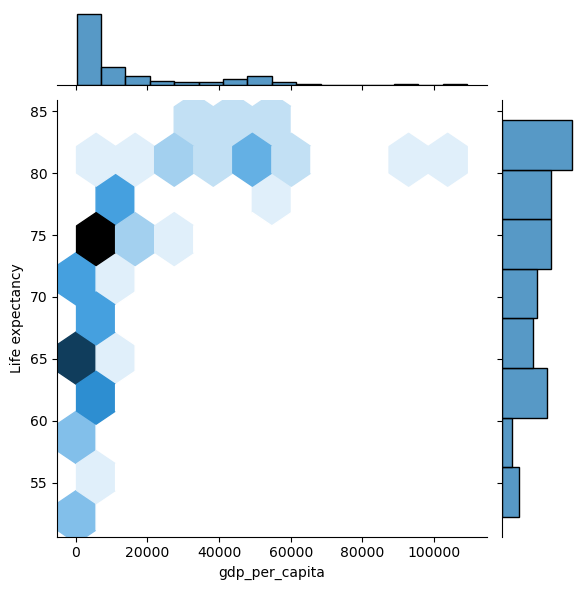

In [398]:
sns.jointplot(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', kind='hex')